In [37]:
import graph_tool.all as gt
import numpy as npr
import numpy.random as npr
from numpy.linalg import norm
from pylab import *

In [38]:
                                       #importing data

mass,lum,mag= loadtxt('new_data.txt', usecols=(2,3,4), unpack=True, skiprows=2)



                                     #building the graph

g=gt.Graph(directed=False)
Mass = g.new_vertex_property('float')
Lum  = g.new_vertex_property('float')
Mag = g.new_vertex_property('float')
pos = g.new_vertex_property('vector<float>')


In [39]:
g.vp.mass=Mass
g.vp.lum = Lum
g.vp.mag = Mag
g.vp.pos = pos

In [40]:
g.list_properties()

lum            (vertex)  (type: double)
mag            (vertex)  (type: double)
mass           (vertex)  (type: double)
pos            (vertex)  (type: vector<double>)


In [42]:
                                      #global parameters

N=800

global init_foot, ibin


a=1
b=0 

prop=g.vp.mag
mag =(mag[0:N])
lum =(lum[0:N])
mass =(mass[0:N])

init_foot = 0.00000005
ibin =      0.9999995
fbin =      0.0

foot = (init_foot)*(10**a)
BIN = ibin - foot*b

draw = True

In [43]:
min(mag), max(mag)

(3.589477, 4.8620830000000002)

In [44]:
min(lum), max(lum)

(5.3431819999999997, 6.0013610000000002)

In [45]:
min(mass), max(mass)

(12.495226000000001, 59.949995000000001)

In [46]:
#minmax scaling
mag-=min(mag);mag/=max(mag)

lum-=min(lum);lum/=max(lum)

mass-=min(mass);mass/=max(mass)

In [47]:
min(mag), max(mag)

(0.0, 1.0)

In [48]:
min(lum), max(lum)

(0.0, 1.0)

In [49]:
min(mass), max(mass)

(0.0, 1.0)

In [50]:
                                       #applying properties


v = g.add_vertex(N)

for i, v in enumerate(g.vertices()):
    g.vp.mass[v]=mass[i]
    g.vp.lum[v]=lum[i]
    g.vp.mag[v]=mag[i]
    g.vp.pos[v] = np.array([mag[i],lum[i]]).T


array([ 0.82984443,  0.00489532])


In [51]:
dP = abs(max(prop.a)-min(prop.a))

print(dP)

1.0


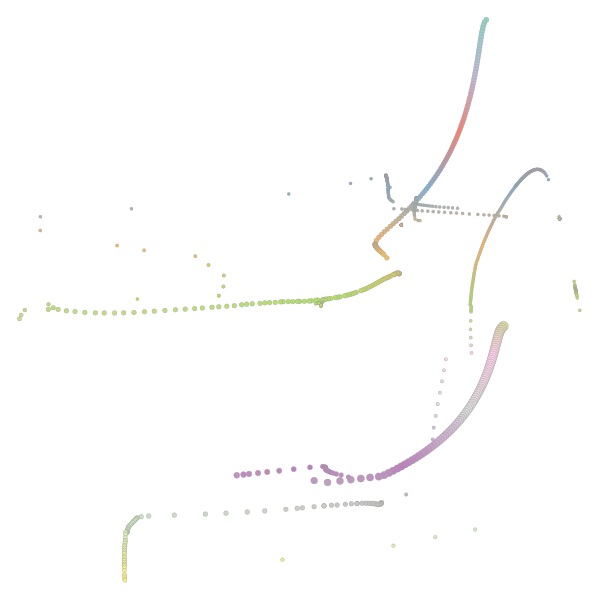

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7faf5406eda0, at 0x7faf53c51dd8>

In [52]:
#HR diagram
gt.graph_draw(g, pos=g.vp.pos, vertex_fill_color=g.vp.lum,vertex_size=gt.prop_to_size(g.vp.mass, mi=3, ma=9.5, log=False, power=2))

In [55]:
posv=np.array([g.vp.pos[i] for i in range(0, N)])

In [56]:
posv[0]
g.vp.pos.copy()

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7faf5406eda0, at 0x7faf53d24470>

In [74]:
gg, gpos = gt.geometric_graph(posv, 0.05)

In [75]:
gg.vp.pos=gpos
gu = gt.graph_union(g, gg, intersection=gg.vertex_index)

In [76]:
print(gu.list_properties())

None


In [77]:
gu.vp.lum=gu.new_vp("float")
gu.vp.mass=gu.new_vp("float")
gu.vp.pos=gu.new_vp("vector<float>")
print(gu.list_properties())

lum            (vertex)  (type: double)
mass           (vertex)  (type: double)
pos            (vertex)  (type: vector<double>)
None


In [78]:
gu.copy_property(g.vp.mass, tgt=gu.vp.mass, g=g)
gu.copy_property(g.vp.lum, tgt=gu.vp.lum, g=g)
gu.copy_property(gpos, tgt=gu.vp.pos, g=gg)

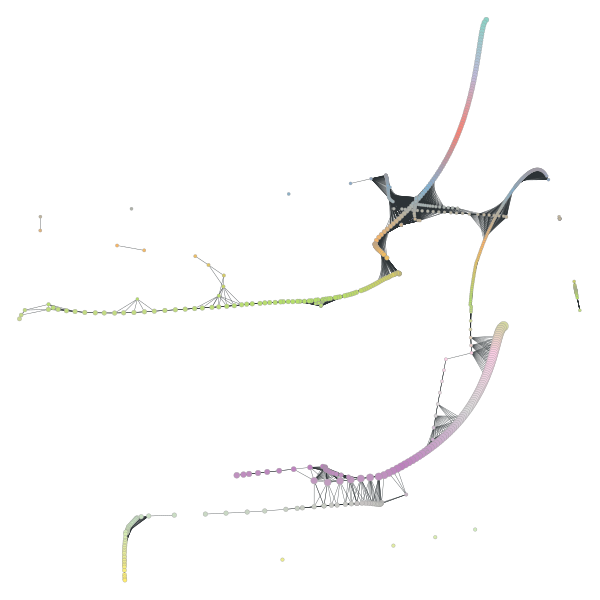

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7faf9036d710, at 0x7faf63fbe470>

In [79]:
#HR diagram with edges
gt.graph_draw(gu, pos=gu.vp.pos, vertex_fill_color=gu.vp.lum,vertex_size=gt.prop_to_size(gu.vp.mass, mi=3, ma=9.5, log=False, power=2))

In [81]:
gu.vp.pos = gt.sfdp_layout(gu, pos=gu.vp.pos)

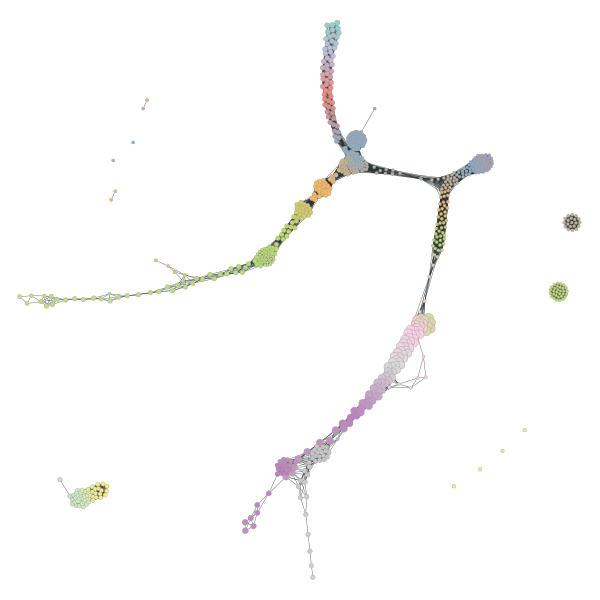

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7faf9036d710, at 0x7faf54680278>

In [82]:
#"HR graph"
gt.graph_draw(gu, pos=gu.vp.pos, vertex_fill_color=gu.vp.lum,vertex_size=gt.prop_to_size(gu.vp.mass, mi=3, ma=9.5, log=False, power=2))